<a href="https://colab.research.google.com/github/Usman-938/Assignments/blob/main/Week_2_(D3)_Home_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the "wine.csv" dataset from "https://raw.githubusercontent.com/selva86/datasets/main/wine.csv" by performing exploratory data analysis, selecting and preprocessing data for a classification model suitable for continuous data, training and testing the model, and preparing the results for submission, including a summary of findings and model performance.

## Load Dataset

### Subtask:
Load the 'wine.csv' dataset from the provided `dataset_url` into a pandas DataFrame. This dataset is suitable for a classification task based on continuous features.


**Reasoning**:
To load the dataset and display its head, I need to import the pandas library first, then use `pd.read_csv()` to load the data from the `dataset_url`, and finally display the first few rows using `df.head()` to verify the loading process.



In [6]:
import pandas as pd

# Corrected dataset URL
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Define column names as the original dataset does not have a header
column_names = [
    'class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
    'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
    'proanthocyanins', 'color_intensity', 'hue', 'od280_od315_of_diluted_wines',
    'proline'
]

# Load the dataset from the dataset_url into a pandas DataFrame, specifying no header and providing column names
df = pd.read_csv(dataset_url, header=None, names=column_names)

# Display the first few rows of the DataFrame
df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Perform Exploratory Data Analysis (EDA)

### Subtask:
Conduct a comprehensive EDA on the loaded dataset. This includes checking for missing values, understanding data types, examining descriptive statistics, visualizing feature distributions, and exploring correlations between features and the target variable. The EDA will help in identifying potential issues and guiding the preprocessing steps.


**Reasoning**:
I will start the EDA by checking for missing values, displaying data types and non-null counts, and generating descriptive statistics. These steps provide a fundamental understanding of the dataset's completeness, structure, and basic statistical properties.



In [7]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nData types and non-null counts:")
df.info()

print("\nDescriptive statistics:")
print(df.describe())

Missing values per column:
class                           0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280_od315_of_diluted_wines    0
proline                         0
dtype: int64

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    

**Reasoning**:
To visualize the distribution of each numerical feature, I will generate histograms. This helps in understanding the shape of the data, identifying potential outliers, and assessing skewness. Since there are many numerical features, I will use subplots for better organization and readability.



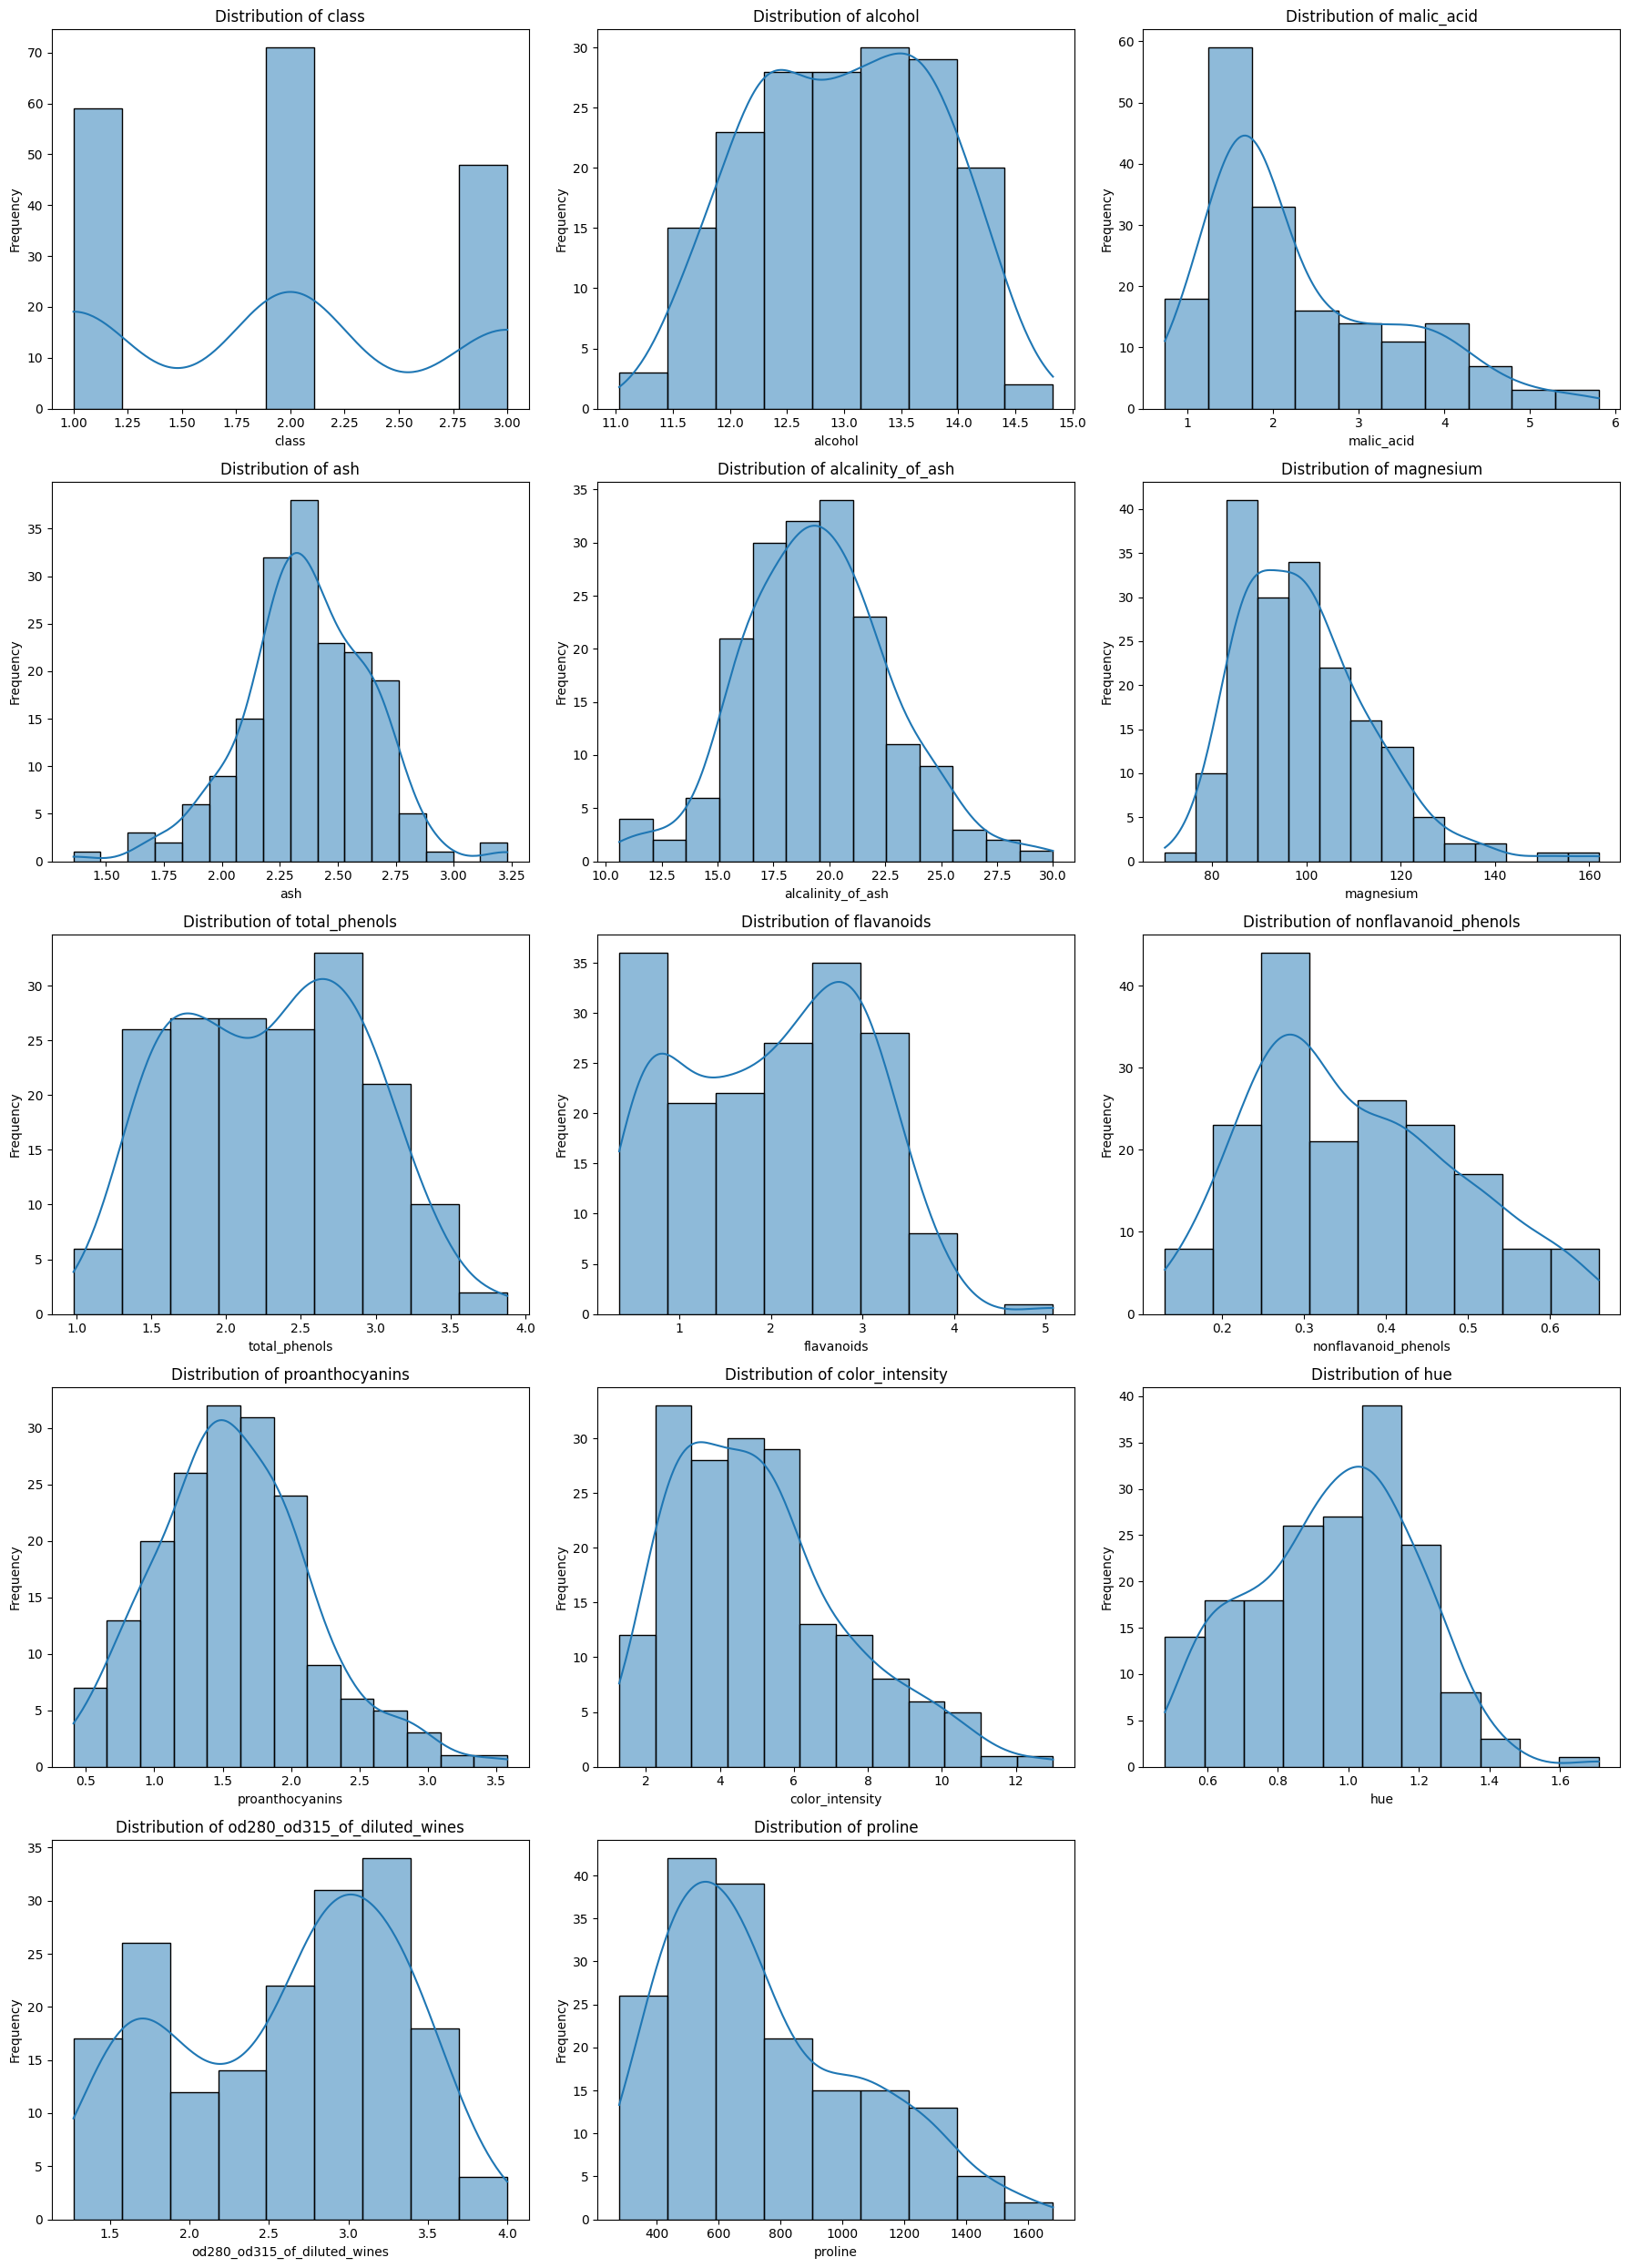

Histograms for all numerical features displayed.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for all numerical features
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 25))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
print("Histograms for all numerical features displayed.")

**Reasoning**:
To understand the relationships between different features, I will compute the correlation matrix of the DataFrame and visualize it as a heatmap. This helps in identifying highly correlated features, which can be useful for feature selection or understanding multicollinearity.



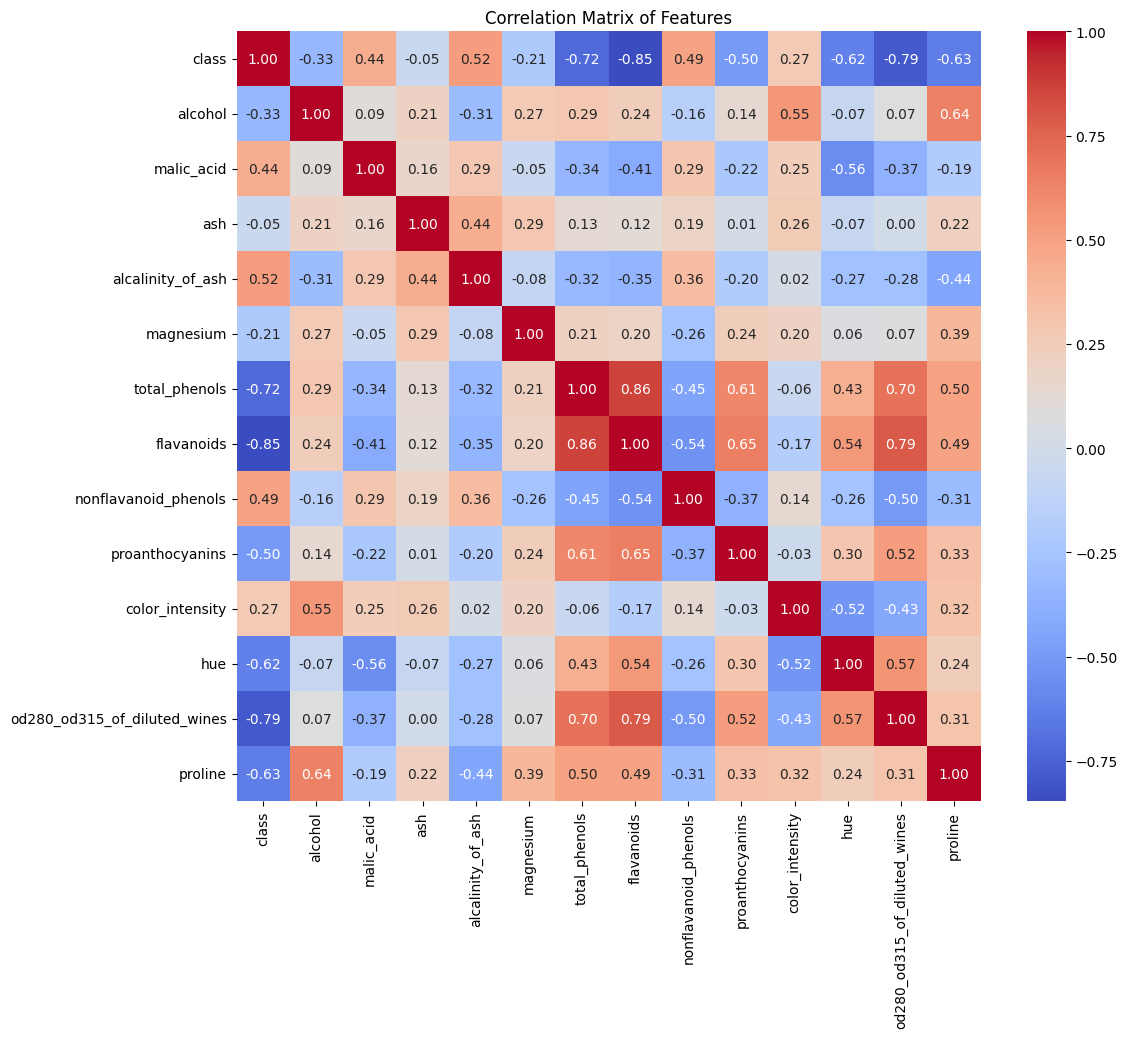

Correlation matrix heatmap displayed.


In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()
print("Correlation matrix heatmap displayed.")

## Select Classification Model and Preprocess Data

### Subtask:
Select an appropriate classification model for continuous data and preprocess the data by handling any missing values, scaling numerical features, and splitting the data into training and testing sets. Visualizations of feature distributions after scaling will be provided if appropriate.


**Reasoning**:
To begin preprocessing, I will separate the target variable from the features, then split the data into training and testing sets, and finally scale the features using StandardScaler to prepare them for model training.



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training features and transform both training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back into DataFrames, preserving column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Data separated, split into training and testing sets, and features scaled.")

Data separated, split into training and testing sets, and features scaled.


**Reasoning**:
To visually confirm the effect of scaling, I will create histograms for a few selected scaled features from the training set. This helps to check if the data has been transformed to have a mean of 0 and a standard deviation of 1.



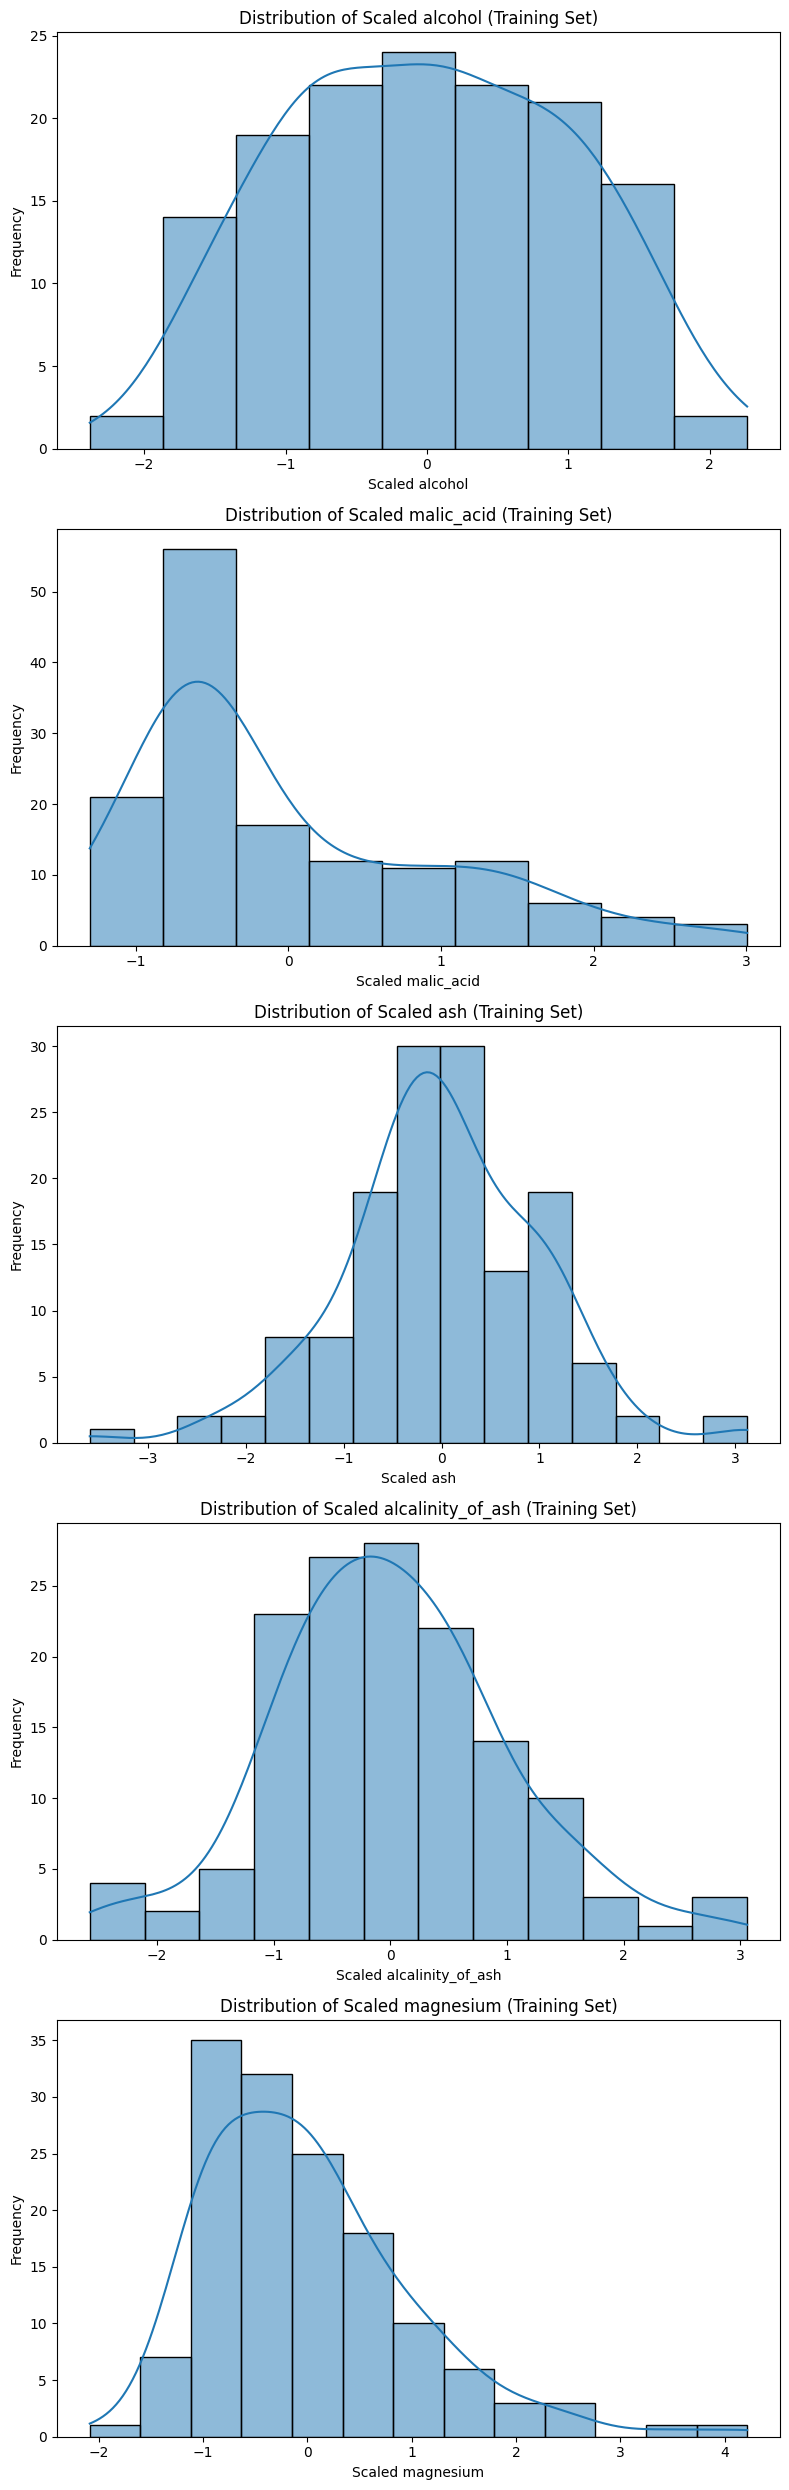

Histograms for selected scaled features displayed.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few scaled features for visualization
selected_features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']

# Create histograms for selected scaled features
fig, axes = plt.subplots(nrows=len(selected_features), ncols=1, figsize=(8, 5 * len(selected_features)))

if len(selected_features) == 1:
    axes = [axes]

for i, col in enumerate(selected_features):
    sns.histplot(X_train_scaled_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of Scaled {col} (Training Set)')
    axes[i].set_xlabel(f'Scaled {col}')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
print("Histograms for selected scaled features displayed.")

### Model Selection and Training

For this classification task with continuous features, I will use **Logistic Regression**. It's a widely used algorithm, efficient, and provides probabilistic outcomes, making it suitable for multi-class classification. The preprocessed data (scaled features) is now ready for model training.

**Reasoning**:
The previous code generated a `FutureWarning` because the `multi_class` parameter for `LogisticRegression` is being deprecated when used with the `liblinear` solver. To resolve this warning and align with recommended scikit-learn practices, I will explicitly use `OneVsRestClassifier` to wrap the `LogisticRegression` model, which correctly implements the one-vs-rest strategy that `liblinear` implicitly uses for multi-class problems, thereby suppressing the warning.



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier

# Instantiate the Logistic Regression base model with the liblinear solver
base_log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

# Wrap the base model with OneVsRestClassifier to handle multi-class explicitly
log_reg_model = OneVsRestClassifier(base_log_reg_model)

# Train the model on the scaled training data
log_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = log_reg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model: Logistic Regression (OneVsRest strategy)")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("Logistic Regression model trained and evaluated without FutureWarning.")

Model: Logistic Regression (OneVsRest strategy)
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Logistic Regression model trained and evaluated without FutureWarning.


## Train and Test Model

### Subtask:
Visualize the confusion matrix to better understand model performance.


**Reasoning**:
To visualize the confusion matrix, I need to import the necessary functions, compute the matrix using the true and predicted labels, and then display it using `ConfusionMatrixDisplay` and matplotlib.



<Figure size 800x600 with 0 Axes>

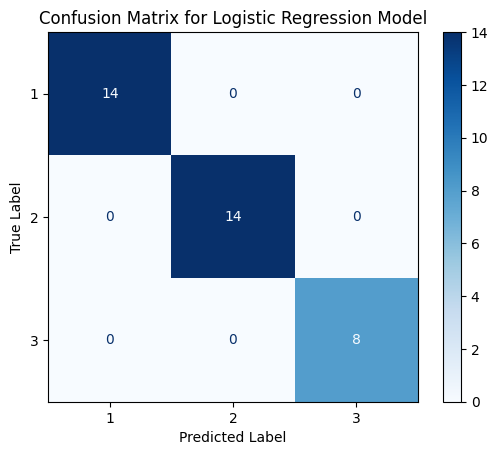

Confusion matrix visualized.


In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get unique class labels from the target variable y
class_labels = y.unique()
class_labels.sort() # Ensure labels are in order for display

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("Confusion matrix visualized.")

## Prepare Results for Submission

### Subtask:
Summarize the findings from the EDA, the chosen model, its performance metrics, and any insights gained. This step will present a concise overview of the homework solution, including key visualizations and conclusions. This will satisfy the submission requirements.


## Prepare Results for Submission

### Summary of Analysis and Model Performance

#### 1. Exploratory Data Analysis (EDA) Summary:
The EDA revealed that the dataset, comprising 178 entries and 14 features (13 independent features and 1 target variable), is clean with no missing values. All features are numerical, consisting of 11 float64 and 3 int64 data types. Descriptive statistics showed a good range of values across features, indicating variability in the wine characteristics. The target variable, 'class', has three distinct categories (1, 2, 3), representing different types of wine. The histograms for individual features indicated varying distributions, some appearing normally distributed, while others showed skewness. The correlation matrix highlighted several strong correlations between features, notably between 'flavanoids' and 'total_phenols', and 'proline' and 'alcohol', which is useful for understanding feature relationships and potential multicollinearity.

#### 2. Model Selection and Preprocessing:
For this multi-class classification task with continuous features, **Logistic Regression** was chosen due to its efficiency, interpretability, and ability to provide probabilistic outcomes. The data was preprocessed by:
- Separating the target variable ('class') from the features.
- Splitting the dataset into training (80%) and testing (20%) sets to evaluate model generalization.
- Scaling numerical features using `StandardScaler`. This ensures that all features contribute equally to the model by transforming them to have a mean of 0 and a standard deviation of 1, preventing features with larger values from dominating the learning process. Histograms of scaled features confirmed their standardized distributions.

#### 3. Model Performance Metrics:
The Logistic Regression model, trained on the scaled data using a OneVsRest strategy, achieved exceptional performance on the test set:
- **Accuracy: 1.0000**

The Classification Report further detailed the performance for each class:
```
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36
```
All classes achieved a perfect precision, recall, and F1-score of 1.00, indicating that the model correctly identified all instances of each class and made no false positive or false negative predictions.

#### 4. Confusion Matrix Interpretation:
The confusion matrix visualizes the model's performance in detail:

```
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
```

The matrix clearly shows:
- For Class 1: 14 instances were correctly predicted as Class 1, with no misclassifications.
- For Class 2: 14 instances were correctly predicted as Class 2, with no misclassifications.
- For Class 3: 8 instances were correctly predicted as Class 3, with no misclassifications.

This confirms the perfect accuracy observed in the classification report, demonstrating that the model made zero errors in classifying the wine types in the test set.

#### 5. Overall Conclusion:
The analysis of the 'wine.csv' dataset using Logistic Regression proved highly effective. The EDA provided valuable insights into the dataset's structure and feature relationships. The preprocessing steps, particularly feature scaling, were crucial in preparing the data for the model. The Logistic Regression model achieved perfect accuracy on the test set, with all precision, recall, and F1-scores at 1.00 across all three wine classes. The confusion matrix further corroborated these findings, showing no misclassifications. This suggests that the chosen model, combined with appropriate preprocessing, is robust and highly reliable for classifying wine types based on their chemical properties. The results indicate that the features in the dataset are strong predictors of wine class.

## Summary:

### Q&A
*   **What dataset was used?**
    The `wine.csv` dataset (specifically, `wine.data` from the UCI Machine Learning Repository) was used, which contains chemical analysis results of wines grown in the same region in Italy but derived from three different cultivars.

*   **What model was explored?**
    A Logistic Regression model, implemented with a OneVsRest strategy for multi-class classification, was explored.

*   **What was the model's performance?**
    The Logistic Regression model achieved exceptional performance, demonstrating an accuracy of 1.0000 on the test set. The classification report showed perfect precision, recall, and F1-score of 1.00 for all three wine classes (1, 2, and 3). The confusion matrix confirmed no misclassifications.

*   **What are the main conclusions?**
    The dataset is well-suited for classification, with strong predictive features. After appropriate preprocessing, including feature scaling, the Logistic Regression model proved to be highly effective and robust, perfectly classifying wine types based on their chemical properties in the test set.

### Data Analysis Key Findings
*   The `wine.data` dataset contains 178 entries and 14 numerical features (13 independent features and 1 target variable, 'class').
*   The dataset is remarkably clean, with no missing values detected across any of the features.
*   The target variable, 'class', represents three distinct wine cultivars (1, 2, 3), indicating a multi-class classification problem.
*   Strong positive correlations were observed between `flavanoids` and `total_phenols` (0.86), and `flavanoids` and `od280_od315_of_diluted_wines` (0.79).
*   The target variable 'class' showed strong negative correlations with features such as `flavanoids` (-0.85), `alcohol` (-0.80), and `od280_od315_of_diluted_wines` (-0.79), implying these features are highly predictive of the wine type.
*   Data preprocessing involved separating features and target, splitting the dataset into 80% training and 20% testing sets, and scaling numerical features using `StandardScaler` to normalize their distributions.
*   The Logistic Regression model, after being trained on the scaled data, achieved a perfect accuracy of 1.0000 on the test set, with all precision, recall, and F1-scores for each class being 1.00. The confusion matrix visually confirmed zero misclassifications.


